In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [7]:
df = pd.read_csv('Data/demographic_data/PopolazioneProvinceFasceEta2017.csv')
df

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2017,2017,240100,NaN,NaN
1,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2017,2017,227557,NaN,NaN
2,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,99,totale,2017,2017,467657,NaN,NaN
3,ITC,Nord-ovest,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2017,2017,63027,NaN,NaN
4,ITC,Nord-ovest,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2017,2017,59993,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42223,ITG2C,Carbonia-Iglesias,JAN,popolazione al 1º gennaio,1,maschi,TOTAL,totale,99,totale,2017,2017,61790,NaN,NaN
42224,IT108,Monza e della Brianza,JAN,popolazione al 1º gennaio,1,maschi,TOTAL,totale,99,totale,2017,2017,425127,NaN,NaN
42225,IT108,Monza e della Brianza,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2017,2017,868859,NaN,NaN
42226,IT109,Fermo,JAN,popolazione al 1º gennaio,1,maschi,TOTAL,totale,99,totale,2017,2017,84927,NaN,NaN


In [8]:
df = df[df.Sesso=='totale']
df = df[df.STATCIV2==99]
df = df.drop(df[df.ETA1=='TOTAL'].index)
df.ETA1 = df.ETA1.apply(lambda x: (x.replace('_GE','')))
df.ETA1 = df.ETA1.apply(lambda x: (x.replace('Y','')))
df.ETA1 = df.ETA1.apply(lambda x: int(x))

In [9]:
# creo una colonna per poter calcolare l'età media della polazione con la media ponderata
df['ExP'] = df.apply(lambda x: x.Value if x.ETA1==0 else x.ETA1*x.Value, axis=1)  
df.loc[df.Territorio=='Milano',['Sesso', 'Value','ETA1', 'ExP']]

,Sesso,Value,ETA1,ExP
71,totale,26465,0,26465
533,totale,27253,1,27253
1204,totale,28318,2,56636
1439,totale,28309,3,84927
1732,totale,29395,4,117580
...,...,...,...,...
39932,totale,1967,96,188832
40279,totale,928,97,90016
40643,totale,525,98,51450
41133,totale,376,99,37224


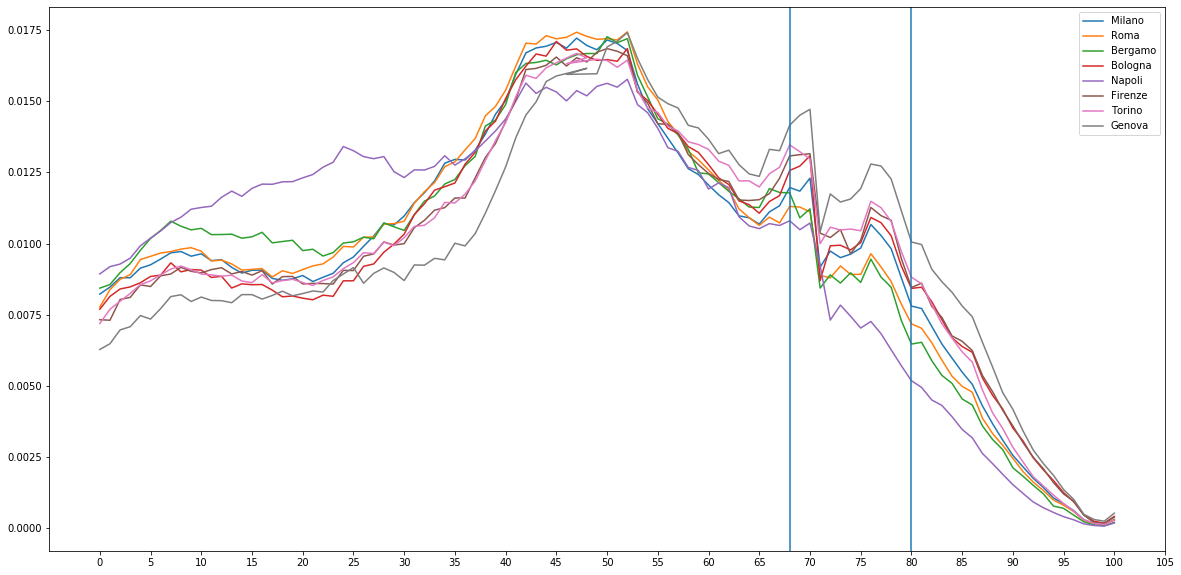

In [10]:
city = ['Milano', 'Roma', 'Bergamo', 'Bologna', 'Napoli','Firenze','Torino','Genova']

plt.figure( figsize=(20,10))
plt.plot(df[df.Territorio==city[0]].ETA1, df[df.Territorio==city[0]].Value/df.loc[df.Territorio==city[0],'Value'].sum(), label = city[0])
plt.plot(df[df.Territorio==city[1]].ETA1, df[df.Territorio==city[1]].Value/df.loc[df.Territorio==city[1],'Value'].sum(), label = city[1])
plt.plot(df[df.Territorio==city[2]].ETA1, df[df.Territorio==city[2]].Value/df.loc[df.Territorio==city[2],'Value'].sum(), label = city[2])
plt.plot(df[df.Territorio==city[3]].ETA1, df[df.Territorio==city[3]].Value/df.loc[df.Territorio==city[3],'Value'].sum(), label = city[3])
plt.plot(df[df.Territorio==city[4]].ETA1, df[df.Territorio==city[4]].Value/df.loc[df.Territorio==city[4],'Value'].sum(), label = city[4])
plt.plot(df[df.Territorio==city[5]].ETA1, df[df.Territorio==city[5]].Value/df.loc[df.Territorio==city[5],'Value'].sum(), label = city[5])
plt.plot(df[df.Territorio==city[6]].ETA1, df[df.Territorio==city[6]].Value/df.loc[df.Territorio==city[6],'Value'].sum(), label = city[6])
plt.plot(df[df.Territorio==city[7]].ETA1, df[df.Territorio==city[7]].Value/df.loc[df.Territorio==city[7],'Value'].sum(), label = city[7])
plt.legend()
plt.xticks(np.arange(0, 110, 5.0))
#plt.grid()
plt.axvline(x=68, ymin=0)
plt.axvline(x=80, ymin=0)
plt.show()

The drop from 70 to 80 is related to World War 2 and not to epidemiological factors

In [12]:
df.loc[df.Territorio=='Bergamo','ExP'].sum()/df.loc[df.Territorio=='Bergamo','Value'].sum()

43.11241489351159

In [26]:
df.loc[df.Territorio=='Milano','ExP'].sum()/df.loc[df.Territorio=='Milano','Value'].sum()

44.473657487521756

Territorio
Abruzzo          45.181986
Agrigento        43.369253
Alessandria      47.839119
Ancona           45.688769
Arezzo           45.996913
                   ...    
Vercelli         47.396991
Verona           43.958137
Vibo Valentia    43.271571
Vicenza          43.753759
Viterbo          45.479922
Length: 137, dtype: float64

In [14]:
df.loc[df.Territorio=='Bergamo',['Sesso', 'Value','ETA1', 'ExP']]

,Sesso,Value,ETA1,ExP
74,totale,9359,0,9359
542,totale,9499,1,9499
1209,totale,9962,2,19924
1532,totale,10318,3,30954
1783,totale,10836,4,43344
...,...,...,...,...
39935,totale,502,96,48192
40226,totale,244,97,23668
40646,totale,124,98,12152
41136,totale,92,99,9108


In [15]:
df_q = df.loc[df.Territorio=='Torino']
df_q.loc[df.ETA1>60].Value.sum()/df_q.Value.sum()*100

29.752306663675547

In [16]:
df_q = df.loc[df.Territorio=='Bergamo']
df_q.loc[df.ETA1>60].Value.sum()/df_q.Value.sum()*100

25.01241065902176

In [17]:
#province = df[df.ITTER107.apply(lambda x: len(x)>4)].groupby(by=['Territorio','ITTER107']).sum().loc[:,('ExP','Value')]
province = df.groupby(by=['Territorio','ITTER107']).sum().loc[:,('ExP','Value')]

province = province.reset_index()
province['MeanAge'] = 0
province['PercOver65'] = 0

In [18]:
for i in province.Territorio:
    province.loc[province.Territorio==i ,'MeanAge'] = round(df.loc[df.Territorio==i,'ExP'].sum()/province.loc[province.Territorio==i,'Value'],1)
    df_q = df.loc[df.Territorio==i]
    province.loc[province.Territorio==i ,'PercOver65'] = round(df_q.loc[df.ETA1>60].Value.sum()/df_q.Value.sum()*100,1 )
province.columns = ['Territorio', 'ITTER107', 'ExP', 'Popolazione', 'MeanAge', 'PercOver65']


In [98]:
province.to_csv('/Data/demographic_data/EtaMediaProvince2017.csv')

In [100]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Territorio   138 non-null    object 
 1   ITTER107     138 non-null    object 
 2   ExP          138 non-null    int64  
 3   Popolazione  138 non-null    int64  
 4   MeanAge      138 non-null    float64
 5   PercOver65   138 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.6+ KB
